In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

%matplotlib inline

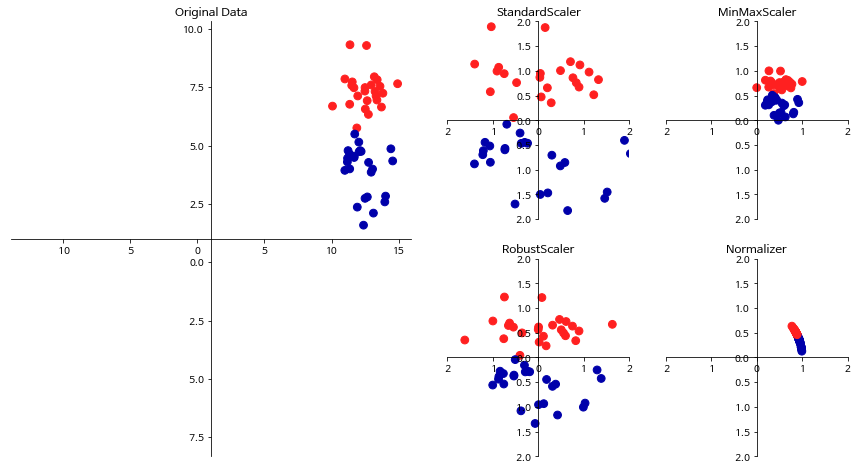

In [2]:
mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)

# scaler.fit_transform 메서드 사용하면 편리함

# 스케일이 조정된 후 데이터셋의 속성
print("변환된 후 크기: {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최솟값:\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최댓값:\n {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최솟값:\n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값:\n {}".format(X_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최솟값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [24]:
# 테스트 데이터도 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성
print("스케일 조정 후 특성별 최솟값:\n{}".format(X_test_scaled.min(axis=0).round(3)))
print("스케일 조정 후 특성별 최댓값:\n{}".format(X_test_scaled.max(axis=0).round(3)))

스케일 조정 후 특성별 최솟값:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최댓값:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

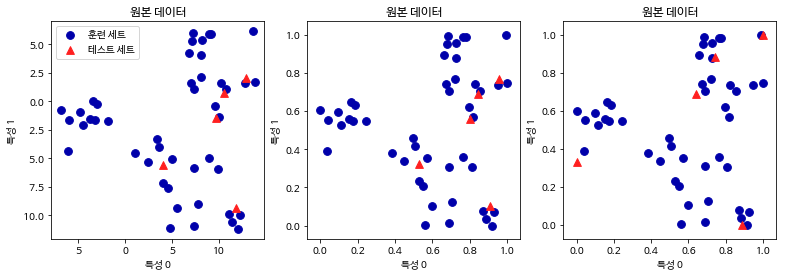

In [31]:
### 스케일 조정의 잘못된 경우 ###

from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트, 테스트 세트의 산점도
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
               c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
               c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일 조정 산점도
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
               c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
               c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[1].set_title("원본 데이터")

# 테스트 세트 스케일 따로 조정
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
               c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
               c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[2].set_title("원본 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

In [32]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
# 앞의 모델 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
# 표준화로 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.96


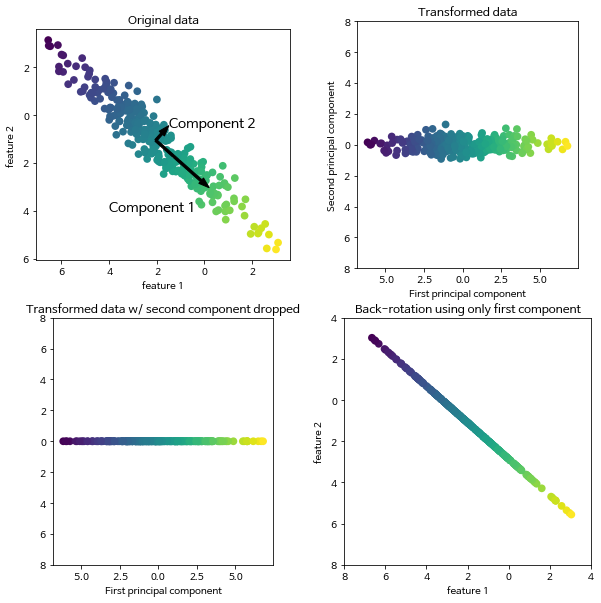

In [38]:
mglearn.plots.plot_pca_illustration()

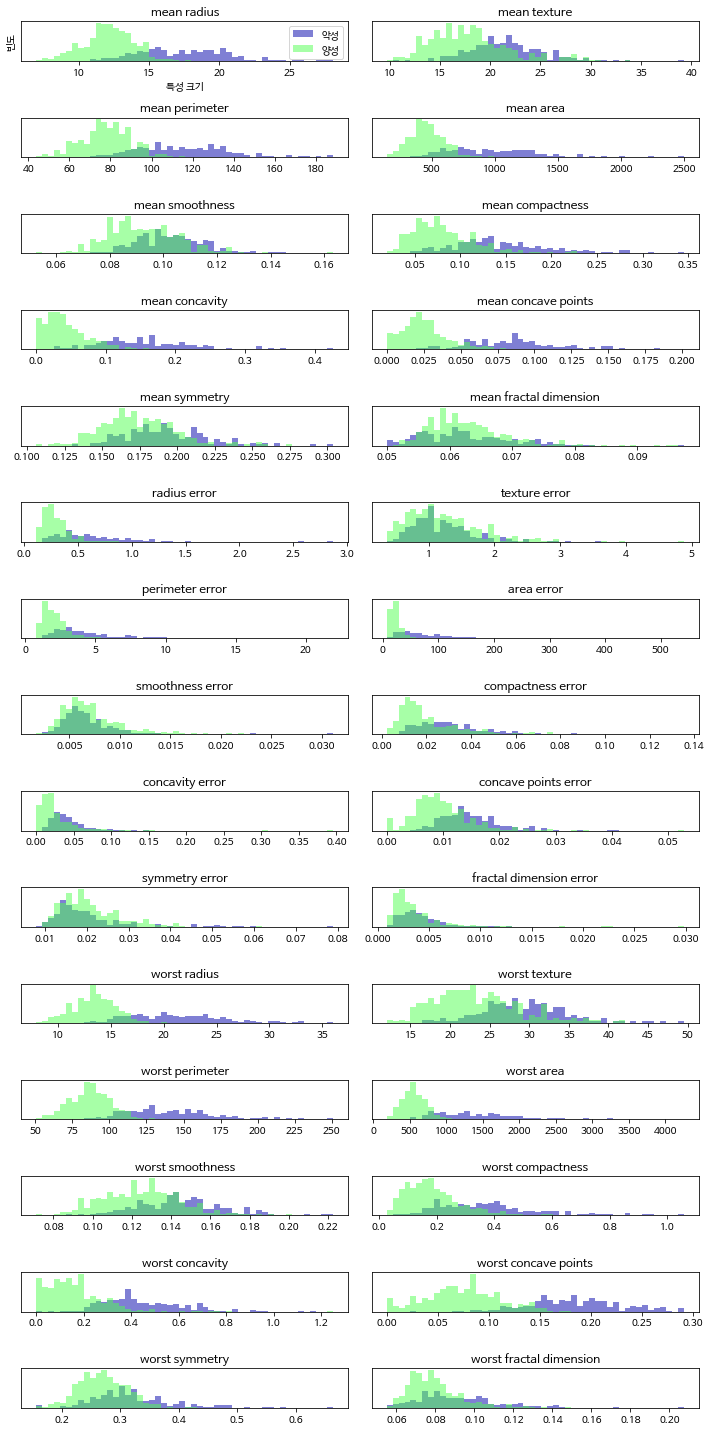

In [43]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc='best')
fig.tight_layout()

In [44]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

In [45]:
from sklearn.decomposition import PCA

# 처음 두 개의 주성분만 유지
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

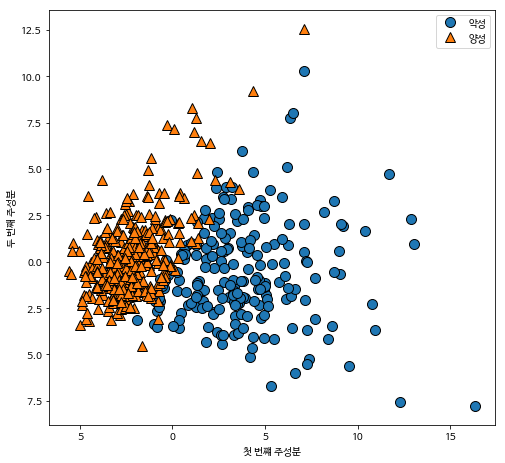

In [46]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번쨰 주성분")
plt.ylabel("두 번째 주성분")

In [49]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))
print("PCA 주성분:\n{}".format(pca.components_))

PCA 주성분 형태: (2, 30)
PCA 주성분:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

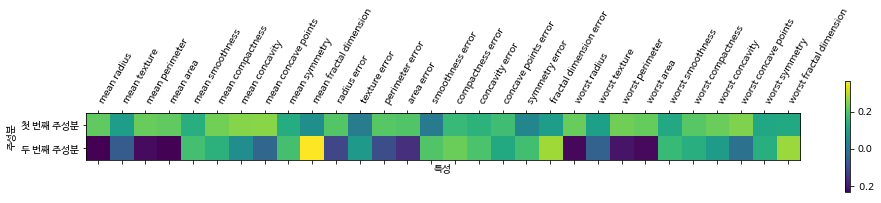

In [50]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

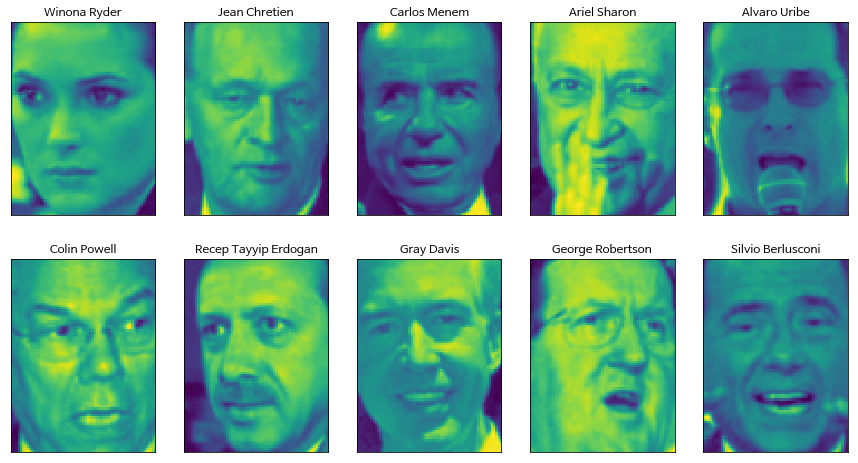

In [51]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [53]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [57]:
# 각 타깃이 나타난 횟수 
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [58]:
# 데이터 편중을 없애기
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 픽셀 값을 0~1 스케일로 조정
X_people = X_people / 255

In [59]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


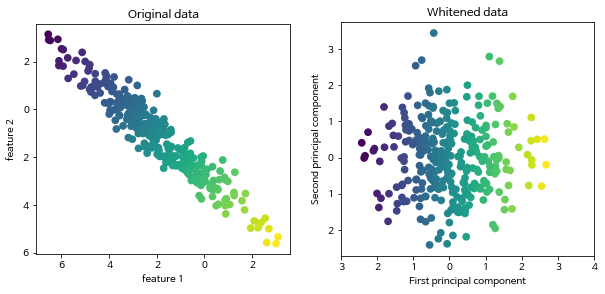

In [61]:
mglearn.plots.plot_pca_whitening()

In [62]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


pca.components_.shape: (100, 5655)


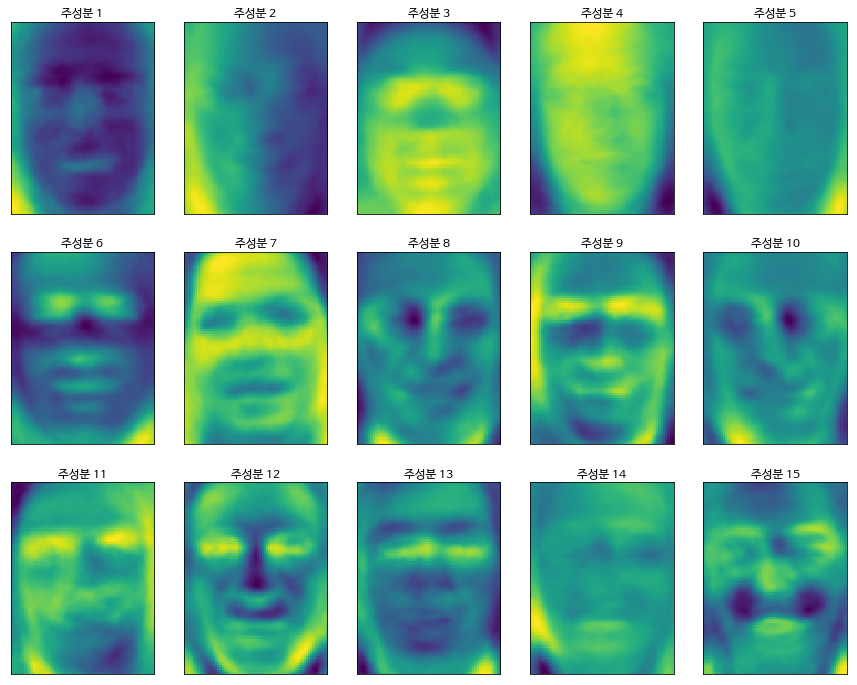

In [67]:
print("pca.components_.shape: {}".format(pca.components_.shape))

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 1.9s, 0.0min


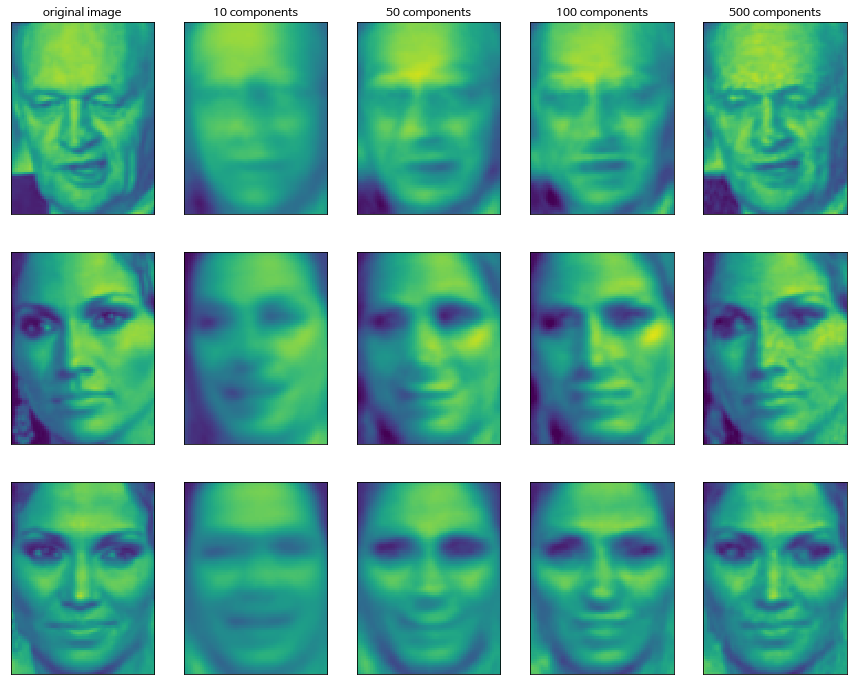

In [68]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '두 번째 주성분')

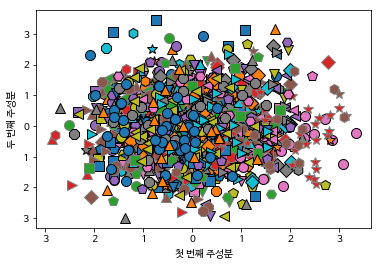

In [69]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

# 3 비지도 학습과 데이터 전처리

- 출력값이나 정보 없이 학습 알고리즘을 가르치는 모든 종류의 머신러닝

## 3.1 비지도 학습의 종류

### 비지도 변환과 군집

① 비지도 변환
- 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘
- 차원 축소(시각화 등)
- 텍스트 문서에서 주제 추출

② 군집
- 데이터를 비슷한 그룹으로 묶는 것
- 같은 사람이 찍힌 사진 그룹화

## 3.2 비지도 학습의 도전 과제

- 알고리즘이 유용한 학습을 했는가 평가

## 3.3 데이터 전처리와 스케일 조정

### 1) 전처리 방법

① StandardScaler
- 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 갖도록

② RobustScaler
- 평균과 분산 대신, 중간 값과 사분위 값을 사용, 이상치에 영향을 덜 받음

③ MinMaxScaler
- 모든 특성이 0과 1 사이에 위치하도록 변경

④ Normalizer
- 특성 벡터의 유클리디안 길이가 1이 되도록 조정 (지름이 1인 원 안에 데이터 투영)

### 2) 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정

- 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다는 점이 중요

### 3) 지도 학습에서 데이터 전처리 효과

- 선형 모델, SVM, 신경망 등에 사용하여 성능 향상을 시킬 수 있음

## 3.4 차원 축소, 특성 추출, 매니폴드 학습

### 1) 주성분 분석(PCA)

- 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술
    - 주성분 1, 분산이 가장 큰 방향을 찾고,(특성들의 상관관계가 가장 큰 방향)
    - 첫 번째 방향과 직각인 방향중에서 가장 많은 정보를 담은 방향을 찾음
    - 회전하기 전 데이터의 평균을 빼서 중심을 원점에 맞춤
    - 주성분 1과 2를 x축과 y축에 나란하도록 회전
    - 1차원 데이터셋으로 차원 감소시킴
    - 가장 유용한 방향을 찾아서 그 방향의 성분만 유지
    - 다시 평균을 더해서 원래대로 회전
- 주된 분산의 방향이라고 하여 주성분 -> 원본 특성 갯수만큼 주성분이 있음
- 두 축의 해석이 쉽지 않음: 원본 데이터에 있는 여러 특성이 조합된 형태이기 때문

### 1-1) 고유얼굴(eigenface) 특성 추출

- PCA는 특성 추출에도 사용 가능
- 화이트닝: 주성분의 스케일이 같아지도록 조정, StandardScaler 적용과 같음